In [1]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import splev, splrep

x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *= 0.9

#根据NACA翼型厚度获得宽度曲线
x,y=naca4(nx,20)
bb=y

#根据翼型获得高度曲线
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
aa=y

## 根据B样条曲线确定nn参数  两组参数

x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

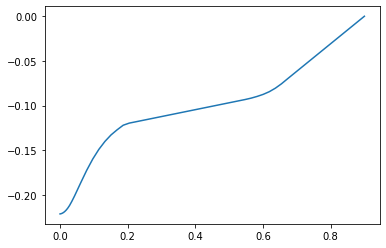

In [73]:
#x轴向竖直方向偏移。vitosinski曲线
#尾部直线，共4条曲线
yy=[[],[]] 
yy1= zhixian(x=np.linspace(0,0.25, 12 ),k1=0,k2=0.007)      #参数1

yy1[0] = yy1[0]+0.65  
yy1[1]=yy1[1]
yy1[1]-=yy1[1][-1]
yy2= zhixian(x=np.linspace(0.205,0.55, 39 ),k1=0,k2=0.0007)   #参数2
yy2[1] = yy2[1]-(yy2[1][-1]-yy1[1][0])-0.016                   #参数3
yy3 = vitosinski(np.linspace(0,0.2,10),0.2,0.09,0.3)           
yy3[1]=-yy3[1]
yy3[1]=yy3[1]-(yy3[1][-1]-yy2[1][0])
yy[0]= np.append(yy[0],yy3[0])
yy[0]= np.append(yy[0],yy2[0])
yy[0]= np.append(yy[0],yy1[0])
yy[1]= np.append(yy[1],yy3[1])
yy[1]= np.append(yy[1],yy2[1])
yy[1]= np.append(yy[1],yy1[1])

from scipy.interpolate import splev, splrep
s1=splrep(yy[0],yy[1],k=2)
ny1=splev(nx,s1)
plt.plot(nx,ny1)
delta=ny1

(-0.045000000000000005,
 0.9450000000000001,
 -0.2791896268621274,
 0.059953424031106525)

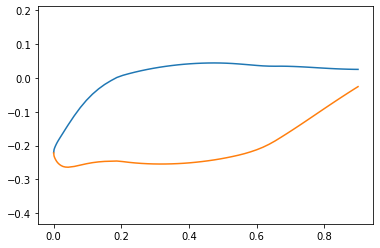

In [74]:
#显示测轮廓
psi = np.linspace(0,2*pi,81)
ymax=[]
ymin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    y+=delta[idx]
    ymax.append(y.max())
    ymin.append(y.min())
plt.plot(nx,ymax)
plt.plot(nx,ymin)
plt.axis("equal")

In [ ]:
of = open("F:\TestFuselageData-1.txt",'w')
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    y+=ny1[idx]
    y*=6.875
    z*=6.875
    plt.plot(z,y)
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.axis("equal")